# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [275]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [276]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [277]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [278]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [279]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [280]:
print(df_data.shape)
df_data.columns

(4324, 9)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [281]:
df_data.isnull().values.any()

True

In [282]:
df_data.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [283]:
print(f'Any NaN values? {df_data.isna().values.any()}')

Any NaN values? True


In [284]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? False


## Descriptive Statistics

In [285]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


In [286]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [287]:
org_count = df_data['Organisation'].value_counts()
org_count.head()

Organisation
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
Name: count, dtype: int64

In [288]:
fig = px.pie(
    labels=org_count.index,
    values=org_count.values,
    title='launches by organisation',
    names=org_count.index,
    hole=0.4
)
fig.update_traces(
    textposition='inside',
    textfont_size=14,
    textinfo='percent'
)
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [289]:
rockets = df_data['Rocket_Status'].value_counts()

In [290]:
fig = px.pie(
    labels=rockets.index,
    values=rockets.values,
    title='Rocket staus',
    names=rockets.index,
    hole=0.4
)
fig.update_traces(
    textposition='inside',
    textfont_size=14,
    textinfo='percent'
)
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [291]:
missions_sts = df_data['Mission_Status'].value_counts()

In [292]:
fig = px.pie(
    labels=missions_sts.index,
    values=missions_sts.values,
    title='Mission staus',
    names=missions_sts.index,
    hole=0.4
)
fig.update_traces(
    textposition='inside',
    textfont_size=14,
    textinfo='percent'
)
fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [293]:
df_data['Price'].isna().value_counts()
n_df_data = df_data.copy()

In [294]:
n_df_data.dropna(inplace=True)

In [295]:
n_df_data['Price'] = n_df_data['Price'].str.replace(',','').astype(float)

<Figure size 2000x1000 with 0 Axes>

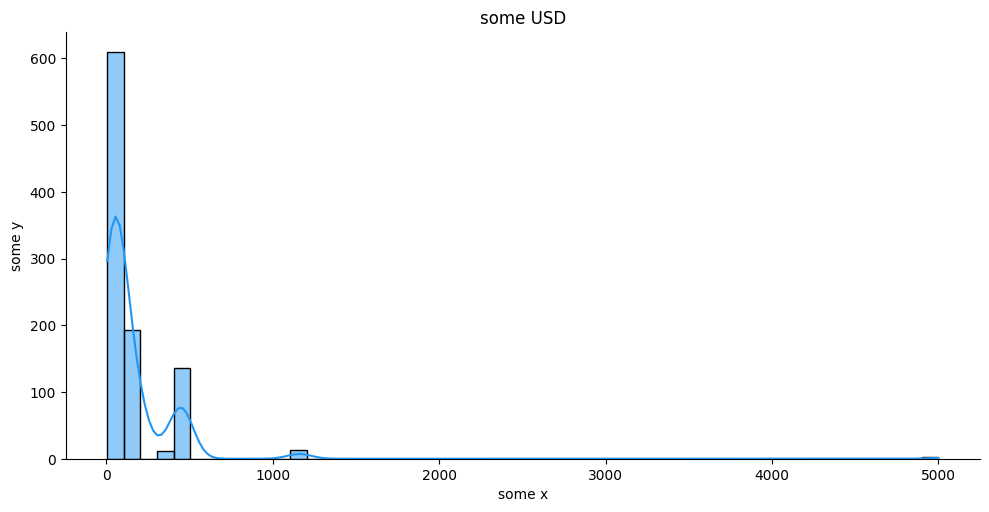

In [296]:
plt.figure(figsize=(10, 5), dpi=200)

sns.displot(
    n_df_data.Price,
    bins=50,
    aspect=2,
    kde=True,
    color='#2196f3'
)

plt.title('some USD')
plt.xlabel('some x')
plt.ylabel('some y')

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [297]:
df_data['Location_ISO01'] = df_data['Location'].apply(lambda x: x.split(',')[-1:][0].strip())

In [298]:
df_data.loc[df_data['Location_ISO01'] == 'Russia', 'Location_ISO01'] = 'Russian Federation'
df_data.loc[df_data['Location_ISO01'] == 'Barents Sea', 'Location_ISO01'] = 'Russian Federation'

In [299]:
df_data.loc[df_data['Location_ISO01'] == 'Shahrud Missile Test Site', 'Location_ISO01'] = 'Iran, Islamic Republic of'

In [300]:
df_data.loc[df_data['Location_ISO01'] == 'Iran', 'Location_ISO01'] = 'Iran, Islamic Republic of'

In [301]:
df_data.loc[df_data['Location_ISO01'] == 'New Mexico', 'Location_ISO01'] = 'USA'
df_data.loc[df_data['Location_ISO01'] == 'Pacific Missile Range Facility', 'Location_ISO01'] = 'USA'
df_data.loc[df_data['Location_ISO01'] == 'Pacific Ocean', 'Location_ISO01'] = 'USA'
df_data.loc[df_data['Location_ISO01'] == 'Gran Canaria', 'Location_ISO01'] = 'USA'

In [302]:
df_data.loc[df_data['Location_ISO01'] == 'Yellow Sea', 'Location_ISO01'] = 'China'

In [303]:
df_data.loc[df_data['Location_ISO01'] == 'North Korea', 'Location_ISO01'] = 'PRK'
df_data.loc[df_data['Location_ISO01'] == 'South Korea', 'Location_ISO01'] = 'KOR'

In [304]:
print(countries.get("PRK"))

Country(name="Korea, Democratic People's Republic of", alpha2='KP', alpha3='PRK', numeric='408', apolitical_name="Korea, Democratic People's Republic of")


In [305]:
df_data['Location_ISO'] = df_data['Location_ISO01'].apply(lambda x: countries.get(x)[2])

In [306]:
df_data_countries = df_data.groupby(['Location_ISO']).agg({'Location_ISO01': pd.Series.count})

In [307]:
df_data_countries.head()

,Location_ISO01
Location_ISO,
AUS,6
BRA,3
CHN,269
FRA,303
IND,76


In [308]:
world_map = px.choropleth(
    df_data,
    color='Location_ISO',
    locations='Location_ISO',
    hover_name='Location_ISO01',
    color_continuous_scale=px.colors.sequential.matter
)

world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [309]:
df_data['Mission_Status'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [310]:
# df_data['Location_ISO01'].apply(lambda x: countries.get(x)[2])
df_data['new_ms'] = df_data['Mission_Status'].apply(lambda x: True if x == 'Success' else False)

In [311]:
df_f = df_data[df_data['new_ms'] == False]

In [312]:
world_map = px.choropleth(
    df_f,
    color='Location_ISO',
    locations='Location_ISO',
    hover_name='Location_ISO01',
    color_continuous_scale=px.colors.sequential.matter
)

world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [313]:
burst = px.sunburst(
    df_data,
    path=['Location_ISO', 'Organisation', 'Mission_Status'],
    # values='Mission_Status',
    title='Country -> Orgarnisation -> Mission Status'
)

burst.update_layout(
    xaxis_title='Mission status',
    yaxis_title='Country',
    coloraxis_showscale=False
)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [314]:
df_data['Price'] = df_data['Price'].str.replace(',','').astype(float)

In [315]:
df_total_money = df_data.groupby(
    by=['Organisation']
).agg({'Price': sum})

In [316]:
df_total_money_top20 = df_total_money.sort_values(by='Price', ascending=False)[:20]
df_total_money_top20

,Price
Organisation,
NASA,"76,280.00"
Arianespace,"16,345.00"
ULA,"14,798.00"
RVSN USSR,"10,000.00"
CASC,"6,340.26"
SpaceX,"5,444.00"
Northrop,"3,930.00"
MHI,"3,532.50"
ISRO,"2,177.00"


# Analyse the Amount of Money Spent by Organisation per Launch

In [317]:
df_total_money_per_launch = df_data.groupby(
    by=['Organisation', 'Mission_Status']
).agg({'Price': sum})

In [318]:
df_total_money_per_launch_top20 = df_total_money_per_launch.sort_values(
    by='Price', 
    ascending=False
)[:20]
df_total_money_per_launch_top20

,,Price
Organisation,Mission_Status,
NASA,Success,"74,220.00"
Arianespace,Success,"15,908.00"
ULA,Success,"14,689.00"
RVSN USSR,Success,"10,000.00"
CASC,Success,"6,053.15"
SpaceX,Success,"5,245.00"
MHI,Success,"3,532.50"
Northrop,Success,"3,515.00"
ISRO,Success,"1,861.00"


# Chart the Number of Launches per Year

In [319]:
df_data['nDate'] = df_data['Date'].apply(lambda x: x if len(x) > 16 else x + ' 00:00 UTC')

In [320]:
df_data['nDate'] = pd.to_datetime(df_data['nDate'][:-10], format="%a %b %d, %Y %H:%M %Z")

In [321]:
df_data['l_year'] = df_data['nDate'].dt.year

In [322]:
df_data = df_data.dropna(subset=['l_year'])

In [323]:
launch_per_year = df_data.groupby(
    by=['l_year'],
    as_index=False
).agg({'Mission_Status': pd.Series.count})
launch_per_year.head()

,l_year,Mission_Status
0,"1,958.00",21
1,"1,959.00",20
2,"1,960.00",39
3,"1,961.00",52
4,"1,962.00",82


In [324]:
df_data['l_year'] = df_data['l_year'].astype(int)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4314 entries, 0 to 4313
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0.1    4314 non-null   int64              
 1   Unnamed: 0      4314 non-null   int64              
 2   Organisation    4314 non-null   object             
 3   Location        4314 non-null   object             
 4   Date            4314 non-null   object             
 5   Detail          4314 non-null   object             
 6   Rocket_Status   4314 non-null   object             
 7   Price           964 non-null    float64            
 8   Mission_Status  4314 non-null   object             
 9   Location_ISO01  4314 non-null   object             
 10  Location_ISO    4314 non-null   object             
 11  new_ms          4314 non-null   bool               
 12  nDate           4314 non-null   datetime64[ns, UTC]
 13  l_year          4314 non-null   int64 

In [325]:
l_bar = px.bar(
    x = launch_per_year.l_year,
    y = launch_per_year.Mission_Status,
    orientation='v',
    color=launch_per_year.l_year,
    color_continuous_scale=px.colors.sequential.haline,
    title='Launch per year'
)

l_bar.update_layout(
    xaxis_title='Years',
    yaxis_title='Launches',
    coloraxis_showscale=False
)

l_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [326]:
# df_data['Mission_Status'].apply(lambda x: True if x == 'Success' else False)

In [327]:
# df_data['l_year'] = df_data['nDate'].dt.year
df_data['l_mpm'] = df_data['nDate'].dt.month
df_data['l_mpm'] = df_data['l_mpm'].astype(int)
# # df_data['l_year']
# df_data['nDate']
# df_data.to_csv('sss.csv')

In [328]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4314 entries, 0 to 4313
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0.1    4314 non-null   int64              
 1   Unnamed: 0      4314 non-null   int64              
 2   Organisation    4314 non-null   object             
 3   Location        4314 non-null   object             
 4   Date            4314 non-null   object             
 5   Detail          4314 non-null   object             
 6   Rocket_Status   4314 non-null   object             
 7   Price           964 non-null    float64            
 8   Mission_Status  4314 non-null   object             
 9   Location_ISO01  4314 non-null   object             
 10  Location_ISO    4314 non-null   object             
 11  new_ms          4314 non-null   bool               
 12  nDate           4314 non-null   datetime64[ns, UTC]
 13  l_year          4314 non-null   int64 

In [329]:
launch_mpm = df_data.groupby(
    by=['l_mpm'],
    as_index=False
).agg({'Mission_Status': pd.Series.count})
launch_mpm.head()

,l_mpm,Mission_Status
0,1,268
1,2,334
2,3,350
3,4,381
4,5,326


In [330]:
l_bar = px.bar(
    x = launch_mpm.l_mpm,
    y = launch_mpm.Mission_Status,
    orientation='v',
    color=launch_mpm.l_mpm,
    color_continuous_scale=px.colors.sequential.haline,
    title='Launch per year'
)

l_bar.update_layout(
    xaxis_title='Month',
    yaxis_title='Launches',
    coloraxis_showscale=False
)

l_bar.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [331]:
launch_mpm['l_mpm'] = launch_mpm['l_mpm'].astype(str)

launch_mpm.sort_values(
    by='Mission_Status',
    ascending=True,
    inplace=True
)
launch_mpm.head()

,l_mpm,Mission_Status
0,1,268
4,5,326
1,2,334
10,11,335
2,3,350


In [332]:
l_bar = px.bar(
    x = launch_mpm.l_mpm,
    y = launch_mpm.Mission_Status,
    orientation='v',
    color=launch_mpm.l_mpm,
    color_continuous_scale=px.colors.sequential.haline,
    title='Best months for launch'
)

l_bar.update_layout(
    xaxis_title='launchs',
    yaxis_title='month',
    coloraxis_showscale=False
)

l_bar.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [333]:
launch_avg = df_data.groupby(
    by=['l_year'],
    as_index=False
).agg({'Price': pd.Series.mean})
launch_avg.head()

,l_year,Price
0,1958,NaN
1,1959,NaN
2,1960,NaN
3,1961,NaN
4,1962,NaN


<Axes: xlabel='l_year'>

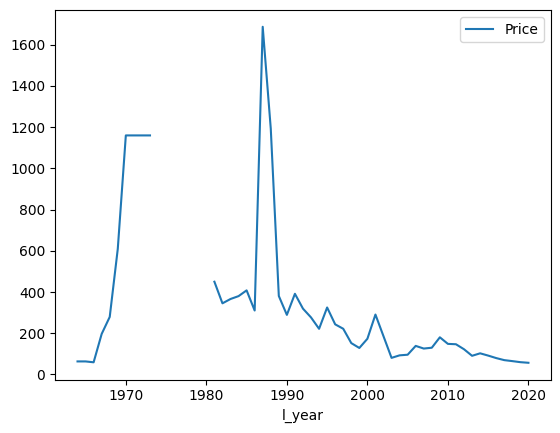

In [334]:
launch_avg.plot.line(
    x='l_year',
    y='Price'
)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [335]:
top10_lpo = df_data['Organisation'].value_counts()

In [336]:
top10_lpo = top10_lpo[:10]

In [337]:
top10_v_bar = px.bar(
    x = top10_lpo.index,
    y = top10_lpo.values, 
    color=top10_lpo.index,
    color_continuous_scale=px.colors.sequential.haline,
    title='Top 10 launches over time.'
)

top10_v_bar.update_layout(
    xaxis_title='Orgarnisation',
    yaxis_title='launches',
    coloraxis_showscale=False
)

top10_v_bar.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [338]:
cold_war = df_data[df_data['l_year'] < 1991]
cold_war = cold_war[cold_war['Location_ISO'].isin(['RUS', 'USA'])]

In [339]:
burst = px.sunburst(
    cold_war,
    path=['Location_ISO', 'Organisation', 'Mission_Status'],
    # values='Mission_Status',
    title='Country -> Orgarnisation -> Mission Status'
)

burst.update_layout(
    xaxis_title='Mission status',
    yaxis_title='Country',
    coloraxis_showscale=False
)

burst.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [340]:
all_usa_rus = df_data[df_data['Location_ISO'].isin(['RUS', 'USA', 'KAZ'])].copy()
all_usa_rus['Location_ISO'] = all_usa_rus['Location_ISO'].apply(lambda x: 'RUS' if x == 'KAZ' else x)

In [341]:
burst = px.sunburst(
    all_usa_rus,
    path=['Location_ISO', 'Organisation', 'Mission_Status'],
    # values='Mission_Status',
    title='Country -> Orgarnisation -> Mission Status'
)

burst.update_layout(
    xaxis_title='Mission status',
    yaxis_title='Country',
    coloraxis_showscale=False
)

burst.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [342]:
v_bar_spit = px.bar(
    x=all_usa_rus['l_year'],
    y=all_usa_rus['Mission_Status'],
    color=all_usa_rus['Location_ISO'],
    title='Year to Year USA vs RUS',
    orientation='v'
)

v_bar_spit.update_layout(
    xaxis_title='Years',
    yaxis_title='Mission Status'
)

v_bar_spit.show()

## Chart the Total Number of Mission Failures Year on Year.

In [343]:
f_data = df_data[df_data['new_ms'] == False]

In [344]:
v_bar_spit = px.bar(
    x=f_data['l_year'],
    y=f_data['Mission_Status'],
    color=f_data['Mission_Status'],
    title='All fail status',
    orientation='v'
)

v_bar_spit.update_layout(
    xaxis_title='Years',
    yaxis_title='Mission Status'
)

v_bar_spit.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [345]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 11 to 4312
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0.1    440 non-null    int64              
 1   Unnamed: 0      440 non-null    int64              
 2   Organisation    440 non-null    object             
 3   Location        440 non-null    object             
 4   Date            440 non-null    object             
 5   Detail          440 non-null    object             
 6   Rocket_Status   440 non-null    object             
 7   Price           54 non-null     float64            
 8   Mission_Status  440 non-null    object             
 9   Location_ISO01  440 non-null    object             
 10  Location_ISO    440 non-null    object             
 11  new_ms          440 non-null    bool               
 12  nDate           440 non-null    datetime64[ns, UTC]
 13  l_year          440 non-null    int64 

In [346]:
# df_data['Organisation'].value_counts()
fail_over_time = f_data['l_year'].value_counts()
fail_over_time.head()

l_year
1961    20
1966    20
1960    20
1967    19
1958    18
Name: count, dtype: int64

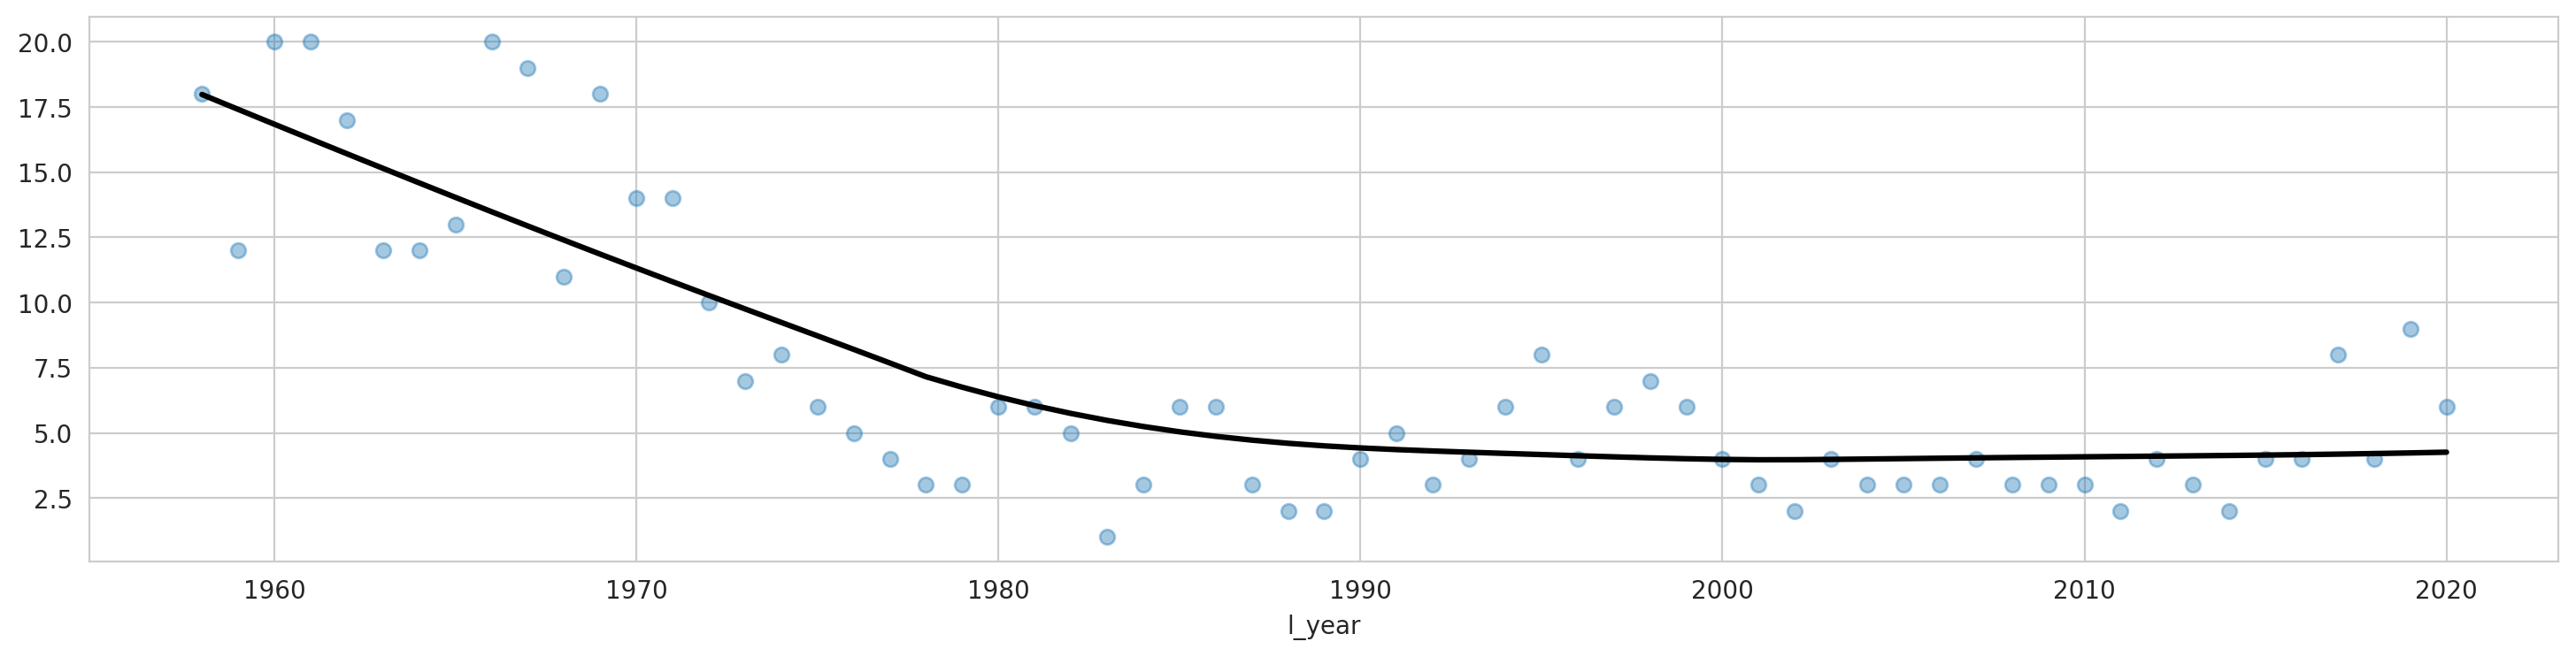

In [351]:
plt.figure(
    figsize=(18, 4),
    dpi=200
)

with sns.axes_style('whitegrid'):
    sns.regplot(
        data=fail_over_time,
        x=fail_over_time.index,
        y=fail_over_time.values,
        lowess=True,
        scatter_kws = {'alpha': 0.4},
        line_kws = {'color': 'black'}
    )

plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [355]:
s_data = df_data[df_data['new_ms'] == True]

In [406]:
ggs_data = s_data.groupby(
    by=['Location_ISO', 'l_year'],
    as_index=False
).count()
ggs_data = ggs_data.sort_values('l_year')[['l_year', 'Location_ISO', 'Date']]
ggs_data.head()

,l_year,Location_ISO,Date
175,1958,KAZ,1
309,1958,USA,2
176,1959,KAZ,2
310,1959,USA,6
177,1960,KAZ,3


In [407]:
cum_launch = ggs_data.groupby(
    by=['Location_ISO', 'l_year']
).sum().groupby(
    level=[0]
).cumsum()
cum_launch.reset_index(inplace=True)

In [409]:
cum_launch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Location_ISO  372 non-null    object
 1   l_year        372 non-null    int64 
 2   Date          372 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [412]:
chart = px.line(
    cum_launch,
    x='l_year',
    y='Date',
    color='Location_ISO',
    hover_name='Location_ISO'
)

chart.update_layout(
    xaxis_title='Year',
    yaxis_title='Launch'
)

chart.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [482]:
some_d1 = df_data[df_data['l_year'].between(1950, 1960)].groupby(
    by=['Organisation'],
    as_index=False
)['Date'].count().max()
some_d1['year'] = 1950

some_d2 = df_data[df_data['l_year'].between(1960, 1970)].groupby(
        by=['Organisation'],
        as_index=False
    )['Date'].count().max()
# )
some_d2['year'] = 1960

some_d3 = df_data[df_data['l_year'].between(1970, 1980)].groupby(
    by=['Organisation'],
    as_index=False
)['Date'].count().max()
some_d3['year'] = 1970

some_d4 = df_data[df_data['l_year'].between(1980, 1990)].groupby(
    by=['Organisation'],
    as_index=False
)['Date'].count().max()
some_d4['year'] = 1980

some_d5 = df_data[df_data['l_year'].between(1990, 2000)].groupby(
    by=['Organisation'],
    as_index=False
)['Date'].count().max()
some_d5['year'] = 1990

some_d6 = df_data[df_data['l_year'].between(2000, 2010)].groupby(
    by=['Organisation'],
    as_index=False
)['Date'].count().max()
some_d6['year'] = 2000

some_d7 = df_data[df_data['l_year'].between(2010, 2020)].groupby(
    by=['Organisation'],
    as_index=False
)['Date'].count().max()
some_d7['year'] = 2010


In [501]:
result = [some_d1, some_d2, some_d3, some_d4, some_d5, some_d6, some_d7]
result = pd.DataFrame(result)

In [510]:
result.rename(columns={'Date': 'Lanuches'}, inplace=True)

In [519]:
result.set_index('year', inplace=True)

In [520]:
result.head(10)

,Organisation,Lanuches
year,,
1950,US Navy,33
1960,Yuzhmash,526
1970,UT,854
1980,US Air Force,473
1990,Yuzhmash,110
2000,VKS RF,74
2010,i-Space,127


In [530]:
fig = px.bar(
    result,
    y=['Lanuches'],
    hover_data=['Organisation'],
    text_auto='.2s'
)
fig.show()